In [1]:
import pandas as pd
import tarfile

def load_beer_advocate_data():
    # Extract and load 'BeerAdvocate.tar.gz'
    file_path = './src/data/BeerAdvocate.tar.gz'
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path='./src/data/')
    print('Extracted BeerAdvocate.tar.gz')

    beers_ba = pd.read_csv('./src/data/beers.csv')
    print('Loaded beers.csv')
    reviews_ba = pd.read_csv('./src/data/reviews.txt.gz', header=None, names=["info"], delimiter='\t', on_bad_lines='skip')
    print('Loaded reviews.txt.gz')
    users_ba = pd.read_csv('./src/data/users.csv')
    print('Loaded users.csv')
    breweries_ba = pd.read_csv('./src/data/breweries.csv')
    print('Loaded breweries.csv')
    ratings_ba = pd.read_csv('./src/data/ratings.txt.gz', header=None, names=["info"], delimiter='\t', on_bad_lines='skip')
    return beers_ba, reviews_ba, users_ba, breweries_ba, ratings_ba

beers_ba, reviews_ba, users_ba, breweries_ba, ratings_ba = load_beer_advocate_data()


Extracted BeerAdvocate.tar.gz
Loaded beers.csv
Loaded reviews.txt.gz
Loaded users.csv
Loaded breweries.csv


<Axes: ylabel='count'>

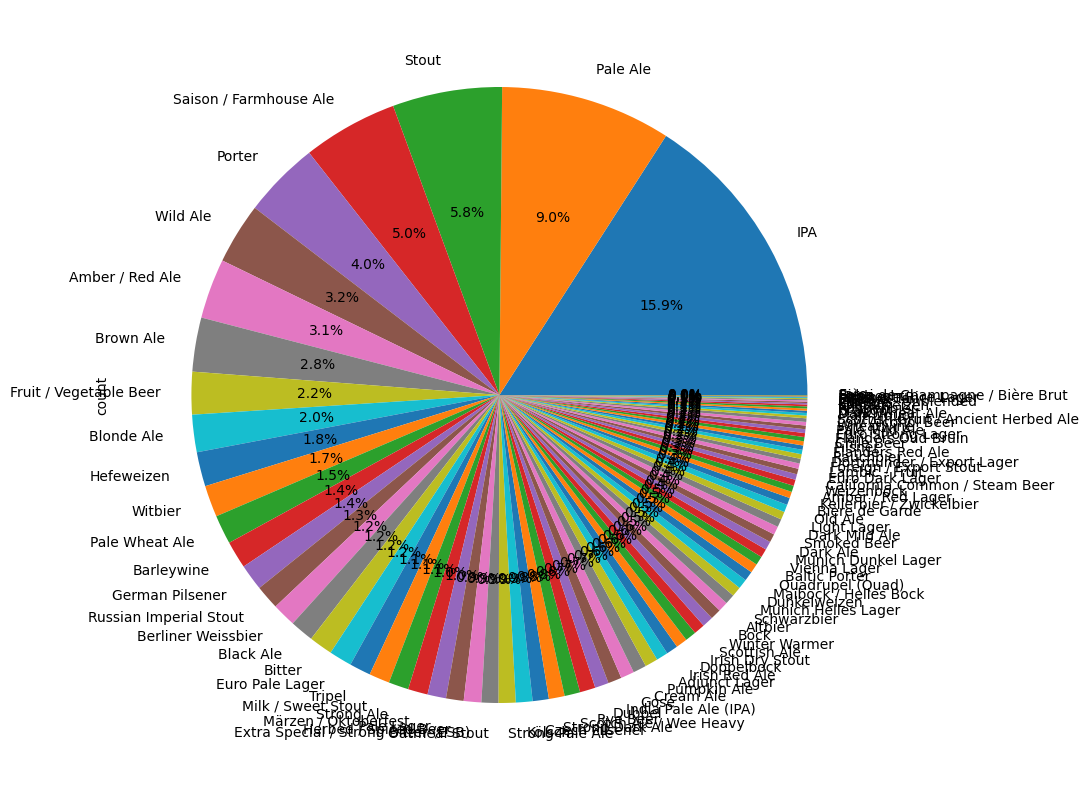

In [2]:

beers_ba['style'] = beers_ba['style'].str.replace('American ', '')
beers_ba['style'] = beers_ba['style'].str.replace('Double / Imperial ', '')
beers_ba['style'] = beers_ba['style'].str.replace('English ', '')
beers_ba['style'] = beers_ba['style'].str.replace(' (APA)', '')
beers_ba['style'] = beers_ba['style'].str.replace('Belgian ', '')

style_count = beers_ba['style'].value_counts()
style_count.plot.pie(autopct='%1.1f%%', figsize=(10,10))

In [3]:
def fromLineToDataFrame(df):

    df['info'] = df['info'].astype(str)
    print("converted to string")
    df[['key', 'value']] = df['info'].str.extract(r'([^:]+):\s*(.*)')
    print("extracted key and value")
# Fill any missing values in the 'value' column with an empty string
    df['value'] = df['value'].fillna('')
    # Identify the start of each new beer entry by finding 'beer_name' rows
    df['entry_id'] = (df['key'] == 'beer_name').cumsum()
    display(df.head())
    print("identified start of each new beer entry")
    # Remove duplicates within each entry (entry_id) by keeping only the first occurrence of each key
    df = df.drop_duplicates(subset=['entry_id', 'key'])
    print("removed duplicates")
    # Reshape the DataFrame using pivot
    df_wide = df.pivot(index='entry_id', columns='key', values='value')
    print("reshaped the DataFrame")
    # Optional: Reset index to remove multi-index structure
    df_wide.reset_index(drop=True, inplace=True)
    return df_wide

reviews = fromLineToDataFrame(reviews_ba)


converted to string
extracted key and value


,info,key,value,entry_id
0,beer_name: Régab,beer_name,Régab,1
1,beer_id: 142544,beer_id,142544,1
2,brewery_name: Societe des Brasseries du Gabon ...,brewery_name,Societe des Brasseries du Gabon (SOBRAGA),1
3,brewery_id: 37262,brewery_id,37262,1
4,style: Euro Pale Lager,style,Euro Pale Lager,1


identified start of each new beer entry
removed duplicates
reshaped the DataFrame


In [4]:
display(reviews.head())

key,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,style,taste,text,user_id,user_name
0,4.5,3.25,2.75,142544,Régab,37262,Societe des Brasseries du Gabon (SOBRAGA),1440064800,3.0,3.25,2.88,Euro Pale Lager,2.75,"From a bottle, pours a piss yellow color with ...",nmann08.184925,nmann08
1,4.5,3.0,3.5,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,1235127600,3.5,3.5,3.67,English Pale Ale,4.0,Pours pale copper with a thin head that quickl...,stjamesgate.163714,StJamesGate
2,4.5,4.0,3.5,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,1142247600,3.5,3.5,3.73,English Pale Ale,4.0,"500ml Bottle bought from The Vintage, Antrim.....",mdagnew.19527,mdagnew
3,4.5,4.0,3.5,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,1101898800,4.5,4.0,3.98,English Pale Ale,4.0,Serving: 500ml brown bottlePour: Good head wit...,helloloser12345.10867,helloloser12345
4,4.5,4.0,4.0,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,1093860000,4.0,4.0,4.00,English Pale Ale,4.0,"500ml bottlePours with a light, slightly hazy ...",cypressbob.3708,cypressbob


In [5]:
ratings_count = reviews['beer_id'].value_counts()

In [6]:
display(beers_ba.head())

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [7]:
beer_counts_df = ratings_count.reset_index().rename(columns={'index': 'beer_id'})
beer_counts_df['beer_id'] = beer_counts_df['beer_id'].astype(str)
beers = beers_ba.reset_index()
beers['beer_id'] = beers['beer_id'].astype(str)

# Merge the Series DataFrame with beer_ba on beer_id
result = beer_counts_df.merge(beers, on='beer_id', how='left')

In [12]:

import matplotlib.pyplot as plt
import matplotlib as mpl

# Disable LaTeX parsing in Matplotlib
mpl.rcParams['text.usetex'] = False

# Group by 'name' and 'style' to get the total count for each
beer_counts = result.groupby('beer_name')['count'].sum()
print("beer_counts")
style_counts = result.groupby('style')['count'].sum()
print("style_counts")



beer_counts
style_counts


In [13]:
display(style_counts)

style
Adjunct Lager        36314
Altbier              10989
Amber / Red Ale      69049
Amber / Red Lager    14067
Baltic Porter        18630
                     ...  
Weizenbock           12548
Wheatwine             5978
Wild Ale             52267
Winter Warmer        26192
Witbier              41961
Name: count, Length: 94, dtype: int64

plotting beer styles


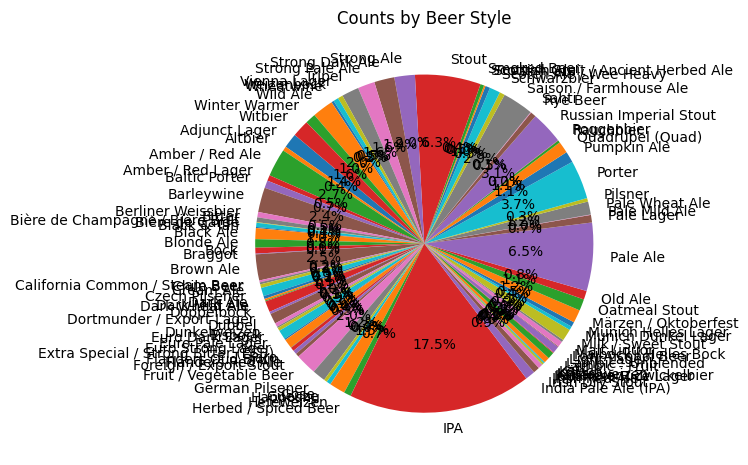

In [14]:

# Plot the pie chart for beer names
plt.figure(figsize=(12, 6))

#plt.subplot(1, 2, 1)
#plt.pie(beer_counts, labels=beer_counts.index, autopct='%1.1f%%', startangle=140)
#plt.title('Counts by Beer Name')
#print("plotting beer names")

# Plot the pie chart for styles
plt.subplot(1, 2, 2)
plt.pie(style_counts, labels=style_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Counts by Beer Style')
print("plotting beer styles")


plt.show()